In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# 데이터 파일 경로
csv_file_path = 'MBTI 500.csv'  # 실제 파일 경로로 변경해주세요.

# 데이터 로드
mbti_data = pd.read_csv(csv_file_path)

# 데이터의 기본적인 특징을 살펴봤습니다

In [3]:
# 데이터의 기본 구조 확인
print("데이터 구조 (행, 열):", mbti_data.shape)
print("\n처음 몇 행:")
print(mbti_data.head())

데이터 구조 (행, 열): (106067, 2)

처음 몇 행:
                                               posts  type
0  know intj tool use interaction people excuse a...  INTJ
1  rap music ehh opp yeah know valid well know fa...  INTJ
2  preferably p hd low except wew lad video p min...  INTJ
3  drink like wish could drink red wine give head...  INTJ
4  space program ah bad deal meing freelance max ...  INTJ


In [4]:
# MBTI 유형별 분포 확인
print("\nMBTI 유형별 분포:")
print(mbti_data['type'].value_counts())



MBTI 유형별 분포:
INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64


In [5]:
# 데이터 요약 정보
print("\n데이터 요약 정보:")
print(mbti_data.info())


데이터 요약 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB
None


In [6]:
# 데이터 기본 통계적 요약
print("\n데이터 기본 통계적 요약:")
print(mbti_data.describe(include='all'))


데이터 기본 통계적 요약:
                                                    posts    type
count                                              106067  106067
unique                                             106067      16
top     know intj tool use interaction people excuse a...    INTP
freq                                                    1   24961


In [7]:
# 특정 MBTI 유형별로 데이터 확인하기 (예시: 'INTJ')
print("\nINTJ 유형의 데이터 예시:")
print(mbti_data[mbti_data['type'] == 'INTJ'].head())



INTJ 유형의 데이터 예시:
                                               posts  type
0  know intj tool use interaction people excuse a...  INTJ
1  rap music ehh opp yeah know valid well know fa...  INTJ
2  preferably p hd low except wew lad video p min...  INTJ
3  drink like wish could drink red wine give head...  INTJ
4  space program ah bad deal meing freelance max ...  INTJ


In [9]:
# 단어 빈도 분석을 위한 CountVectorizer 인스턴스 생성
vectorizer = CountVectorizer(stop_words='english', max_features=100)

In [10]:
# 모든 MBTI 유형에 대한 단어 빈도 분석
mbti_types = mbti_data['type'].unique()
top_words_per_type = {}

In [11]:
for mbti_type in mbti_types:
    texts = mbti_data[mbti_data['type'] == mbti_type]['posts']
    vectorized = vectorizer.fit_transform(texts)
    word_counts = pd.DataFrame(vectorized.toarray(), columns=vectorizer.get_feature_names_out())
    top_words = word_counts.sum().sort_values(ascending=False).head(10)
    top_words_per_type[mbti_type] = top_words

# 각 MBTI 유형별 상위 10개 단어 출력
for mbti_type, top_words in top_words_per_type.items():
    print(f"\n{mbti_type} 유형에서 가장 많이 사용된 상위 10개 단어:")
    print(top_words)


INTJ 유형에서 가장 많이 사용된 상위 10개 단어:
like      135640
people    120377
think     115526
make       85593
thing      85017
know       76724
time       76398
good       73470
say        72003
feel       64914
dtype: int64

INTP 유형에서 가장 많이 사용된 상위 10개 단어:
like      157409
think     141471
people    125875
thing      95794
make       94112
know       82823
say        81821
time       80439
good       78839
feel       73083
dtype: int64

ISFJ 유형에서 가장 많이 사용된 상위 10개 단어:
like      4831
think     4167
people    3467
thing     2859
feel      2652
make      2582
say       2490
know      2432
really    2395
time      2238
dtype: int64

ISFP 유형에서 가장 많이 사용된 상위 10개 단어:
like      7425
think     6081
people    4265
thing     3610
know      3449
feel      3377
really    3306
say       3251
make      3182
type      3161
dtype: int64

ISTJ 유형에서 가장 많이 사용된 상위 10개 단어:
like      8615
think     6485
people    5671
thing     4808
time      4798
make      4627
know      4612
say       4359
feel      4246
really    388

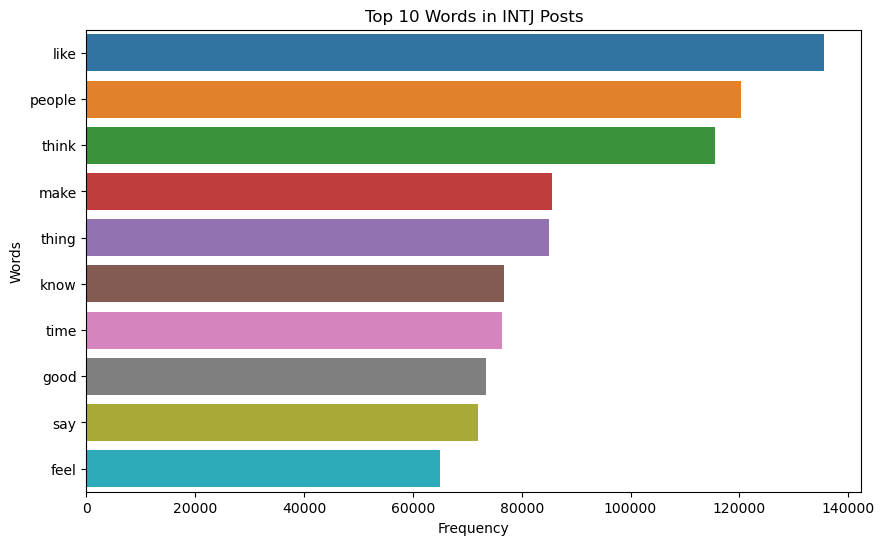

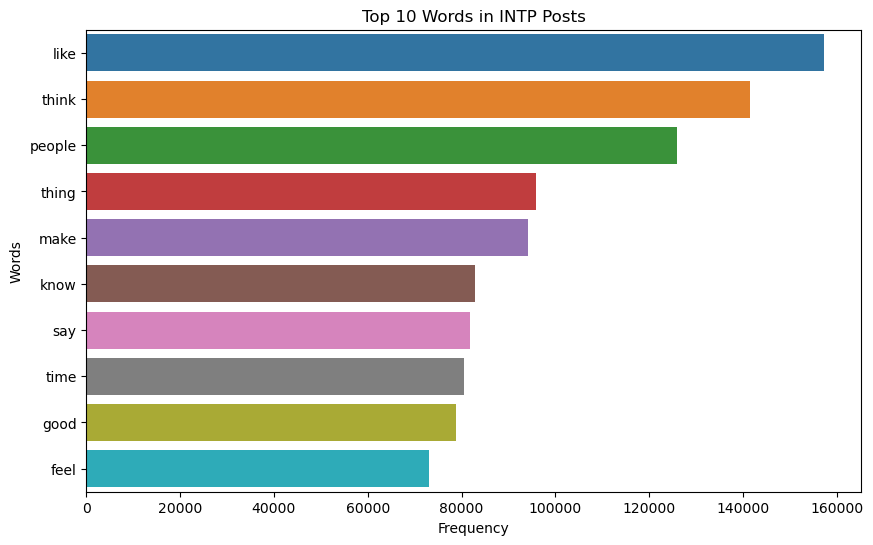

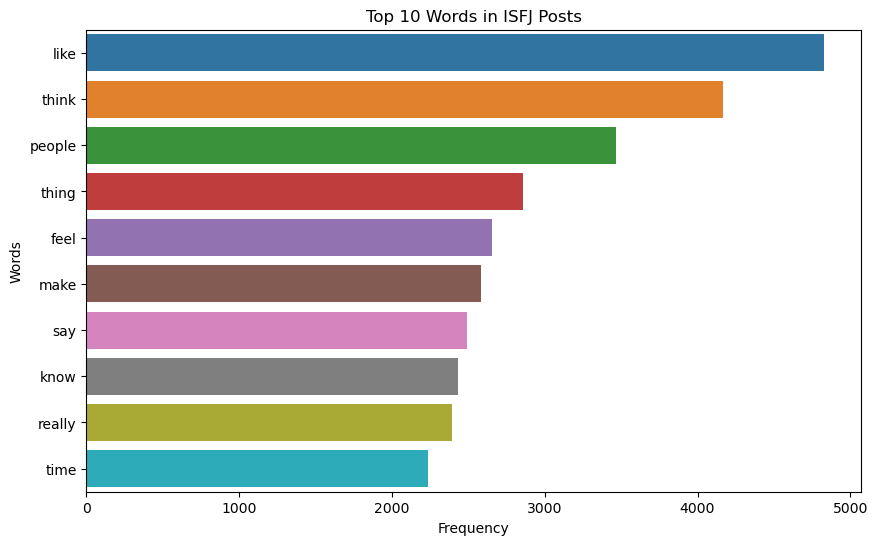

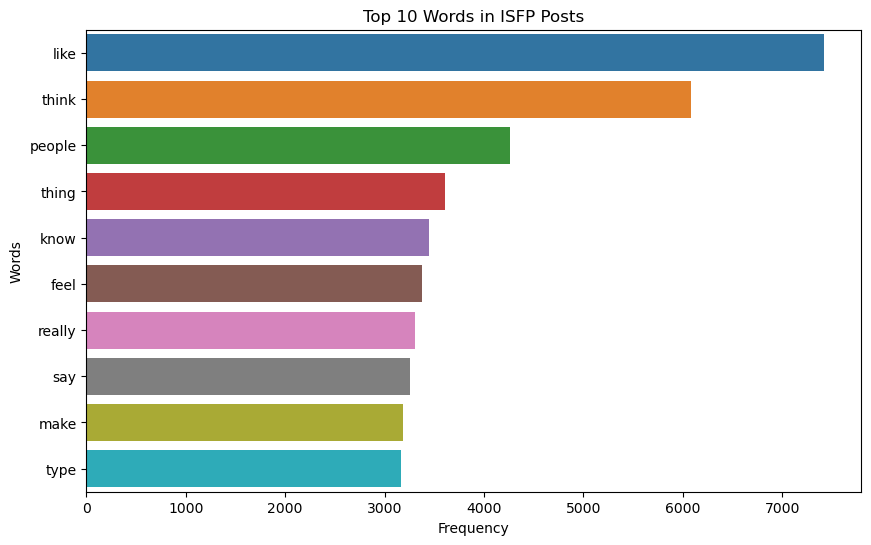

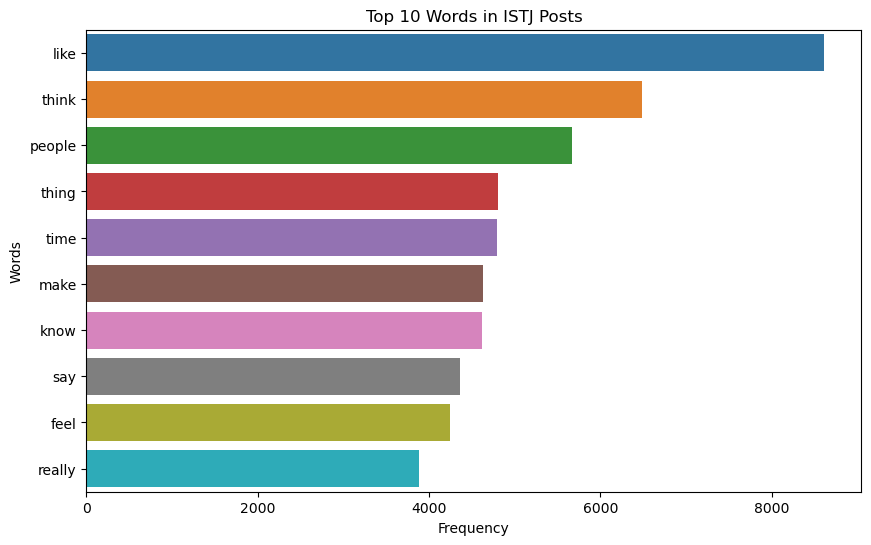

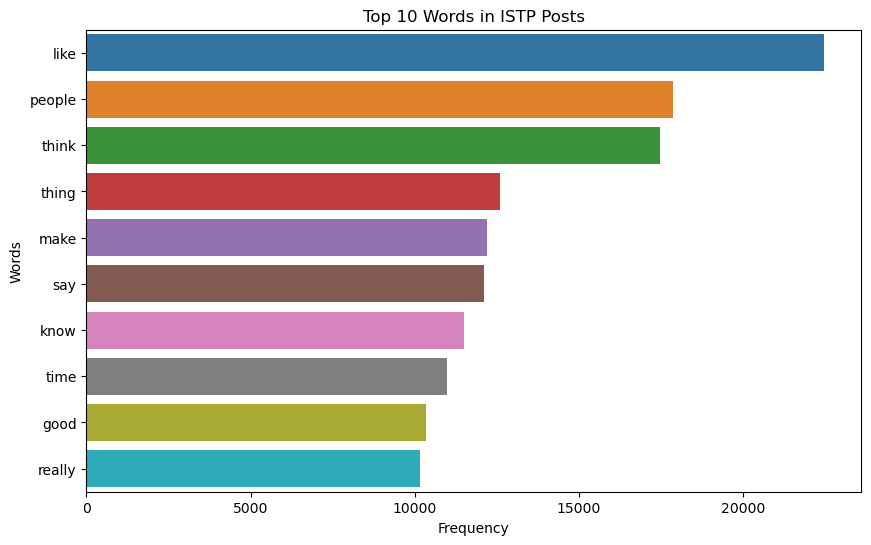

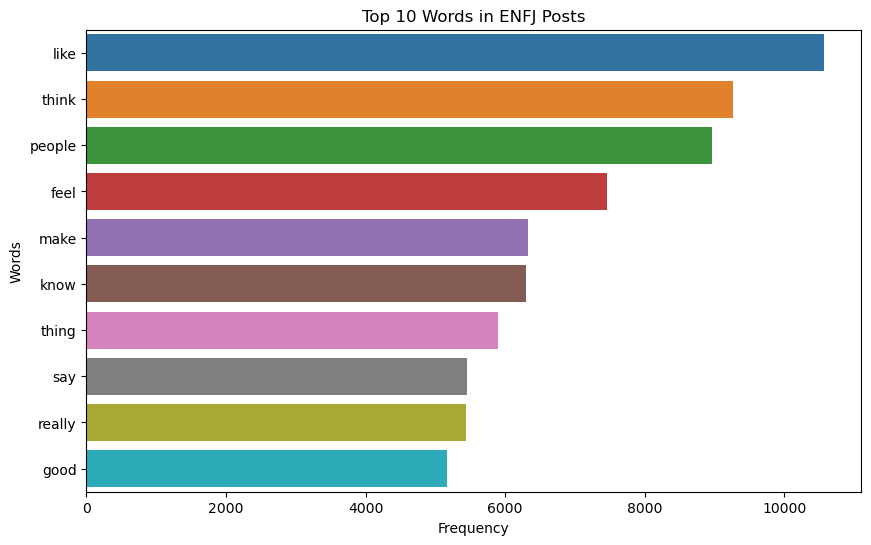

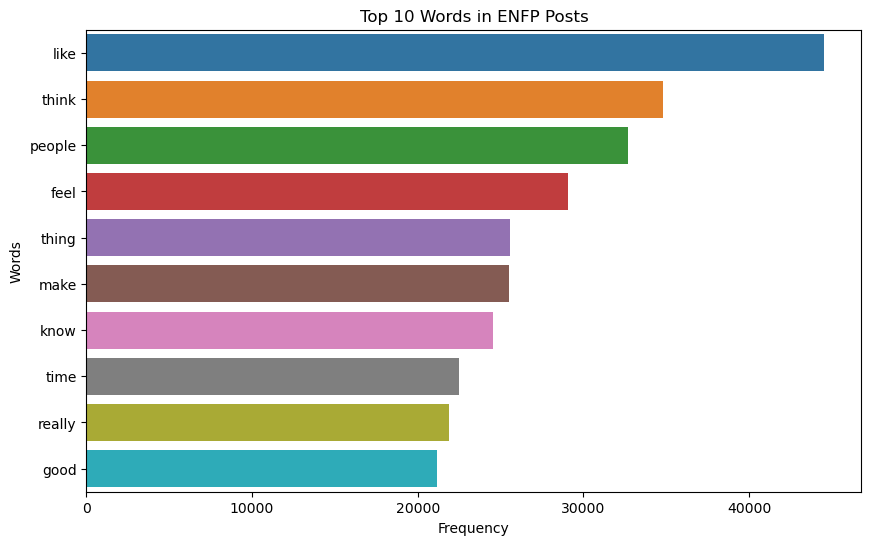

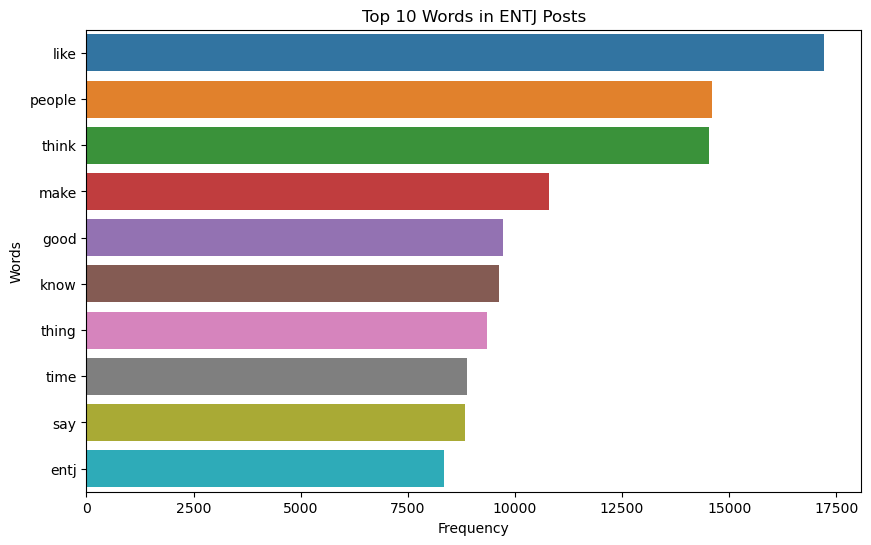

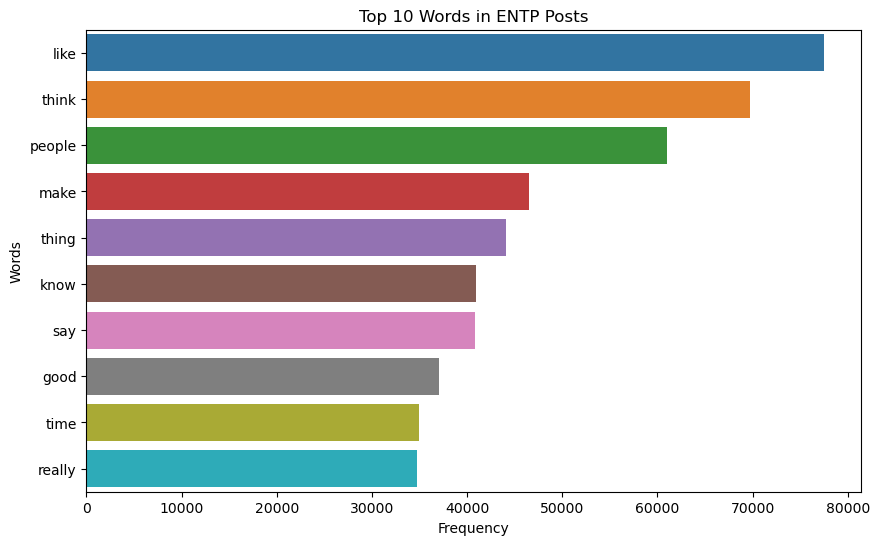

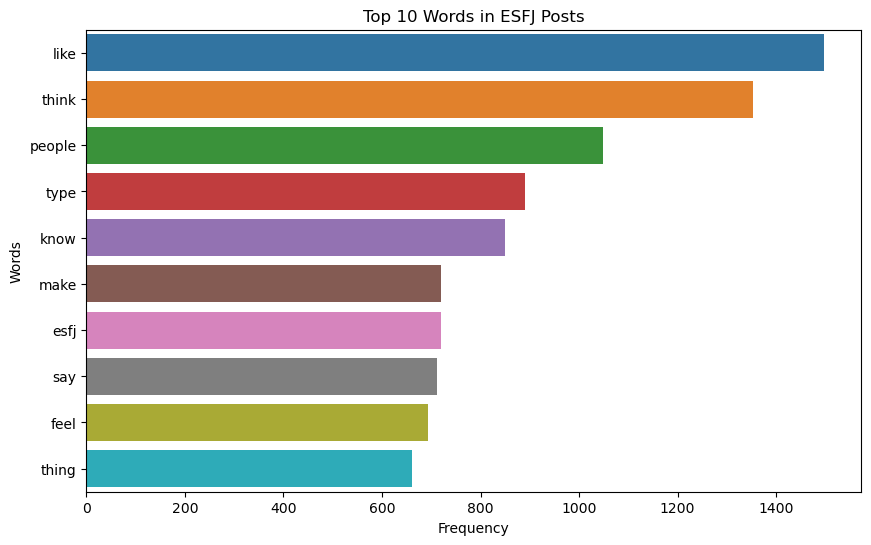

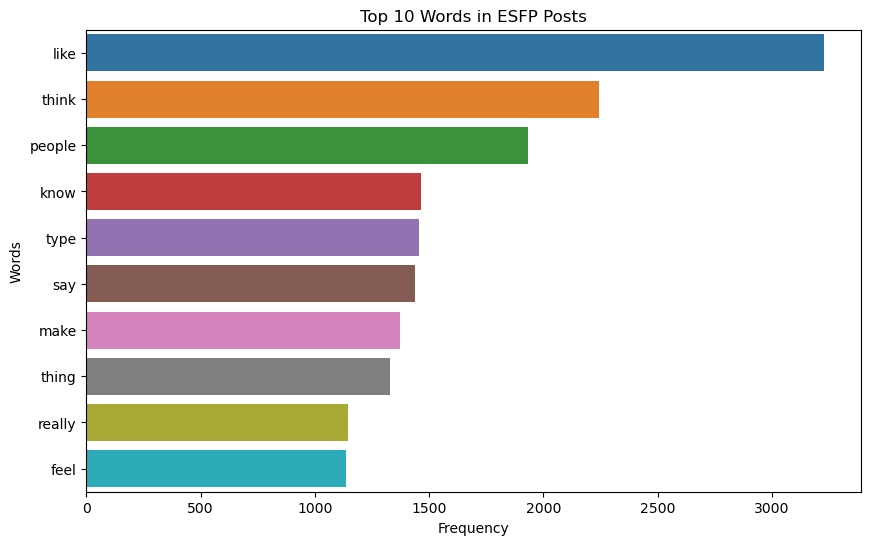

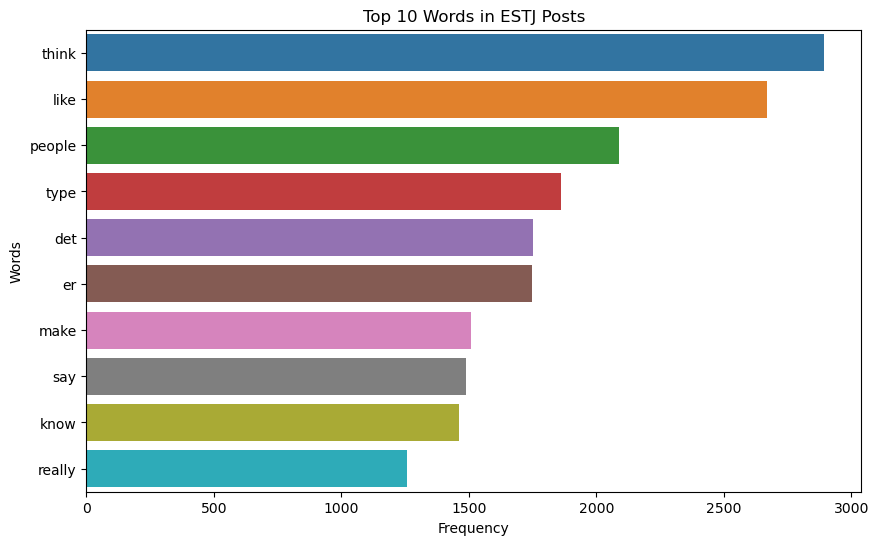

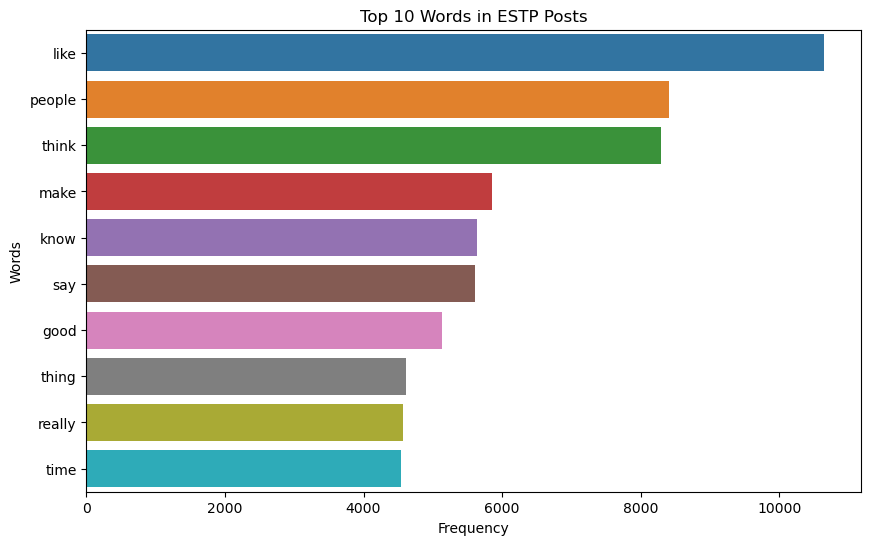

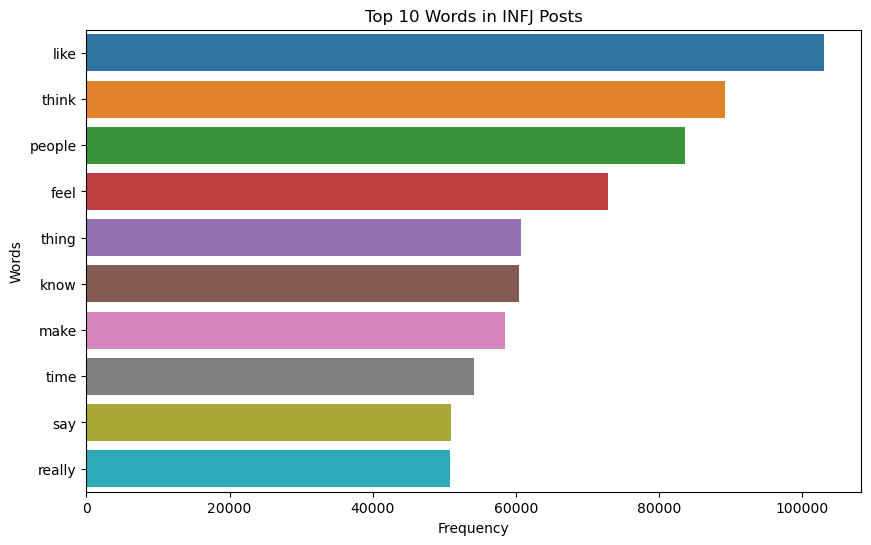

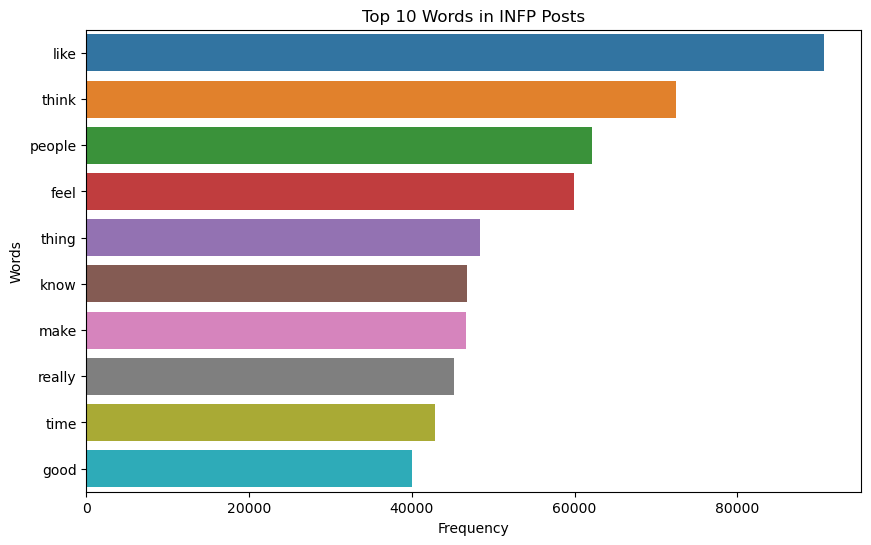

In [12]:
# 모든 MBTI 유형에 대한 단어 빈도 분석
mbti_types = mbti_data['type'].unique()
top_words_per_type = {}

for mbti_type in mbti_types:
    texts = mbti_data[mbti_data['type'] == mbti_type]['posts']
    vectorized = vectorizer.fit_transform(texts)
    word_counts = pd.DataFrame(vectorized.toarray(), columns=vectorizer.get_feature_names_out())
    top_words = word_counts.sum().sort_values(ascending=False).head(10)
    top_words_per_type[mbti_type] = top_words

# 각 MBTI 유형별 상위 10개 단어 시각화
for mbti_type, top_words in top_words_per_type.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_words.values, y=top_words.index)
    plt.title(f"Top 10 Words in {mbti_type} Posts")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# 너무 같은 단어들이 포진해 있어서, unique한 단어로 분석하기로 생각함

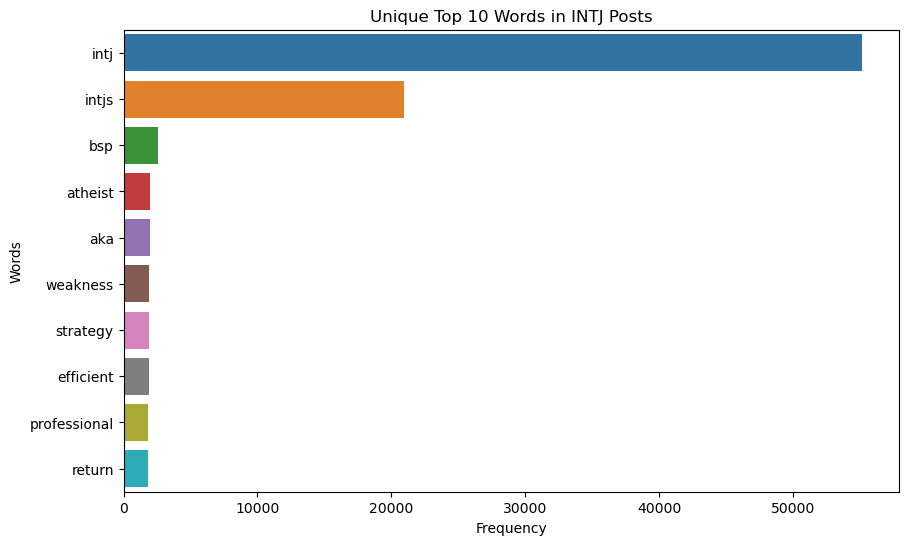

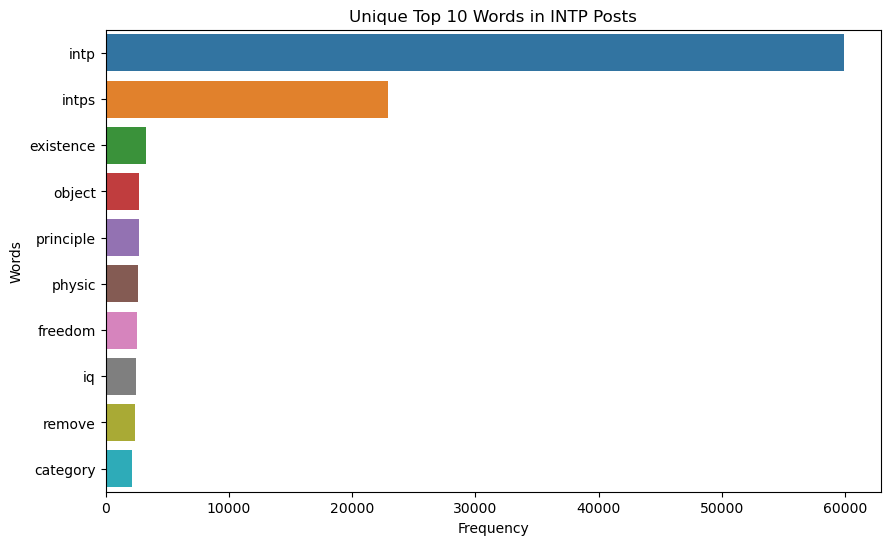

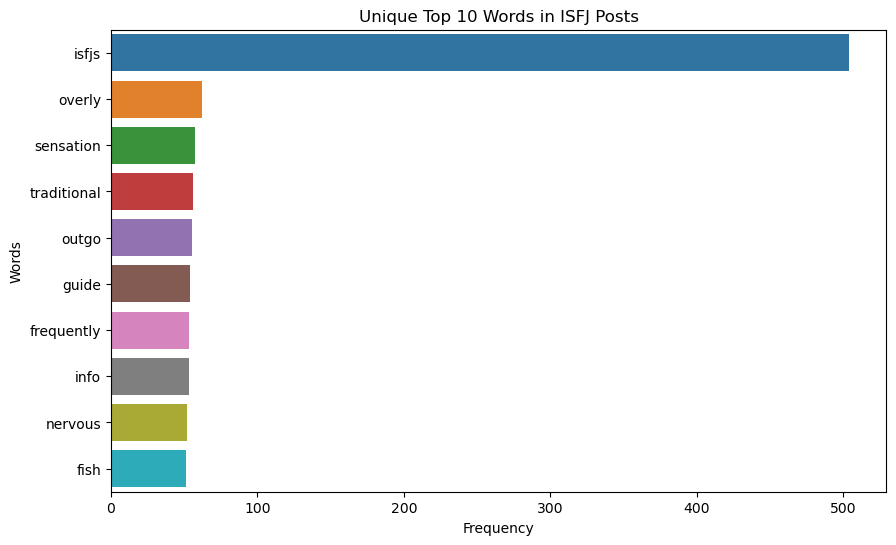

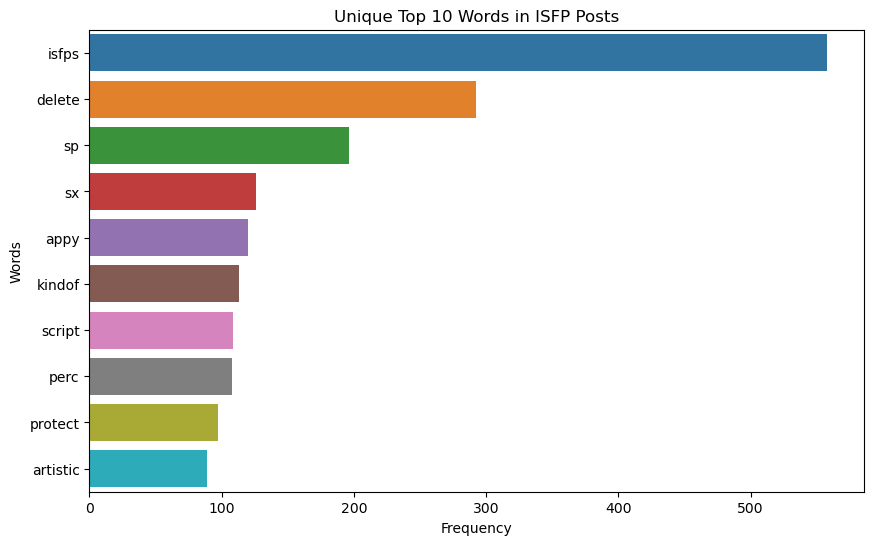

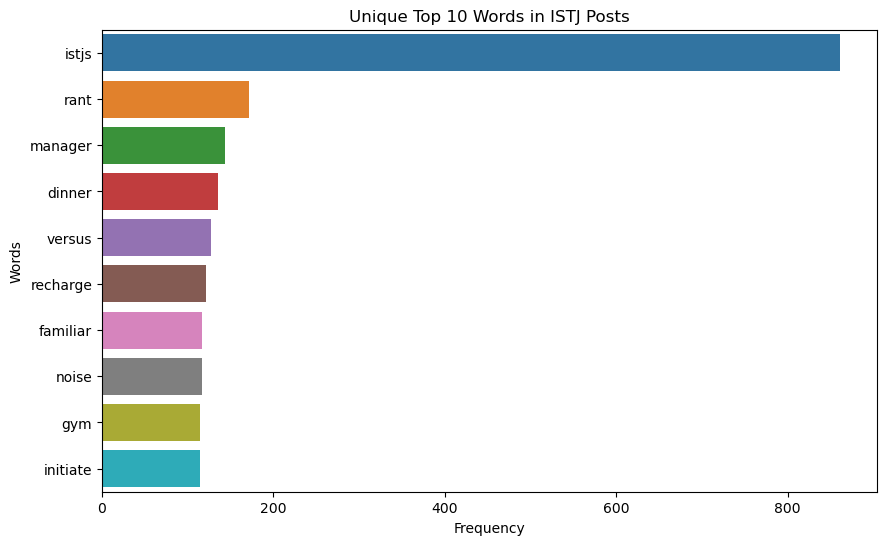

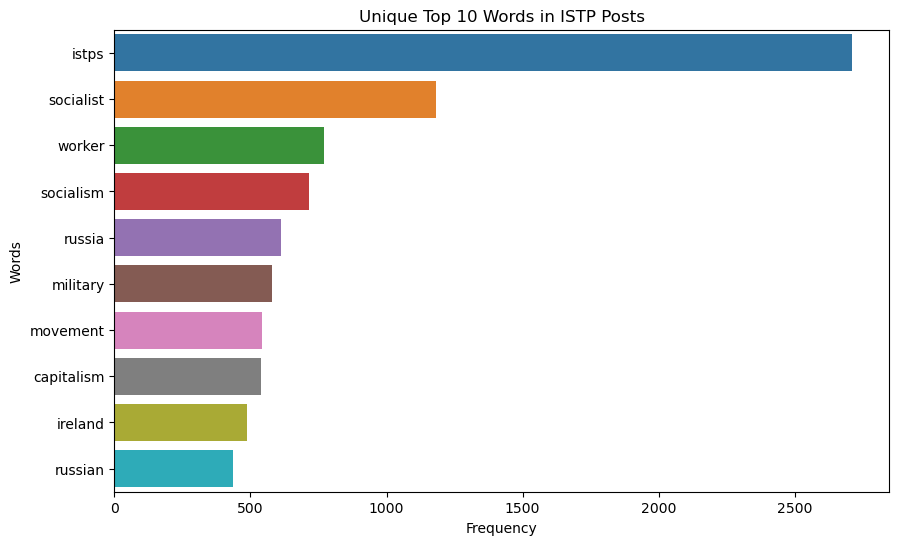

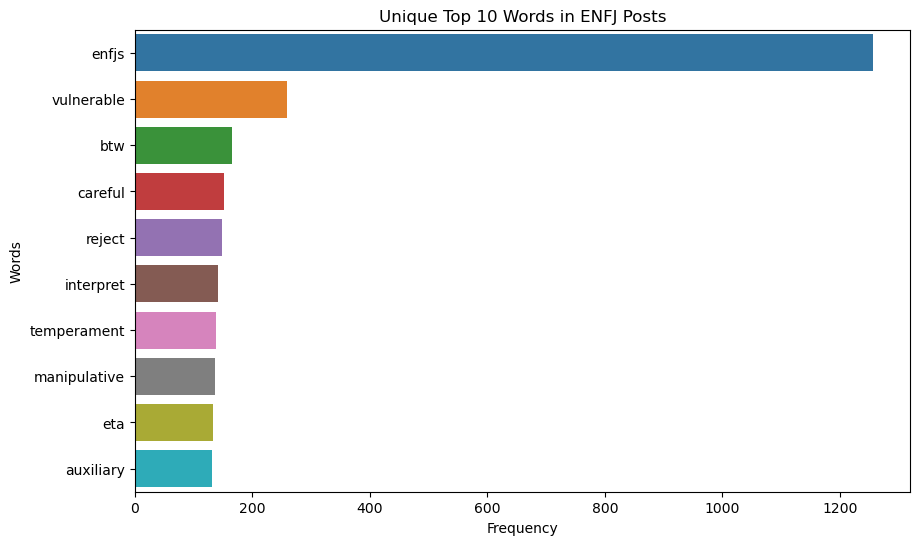

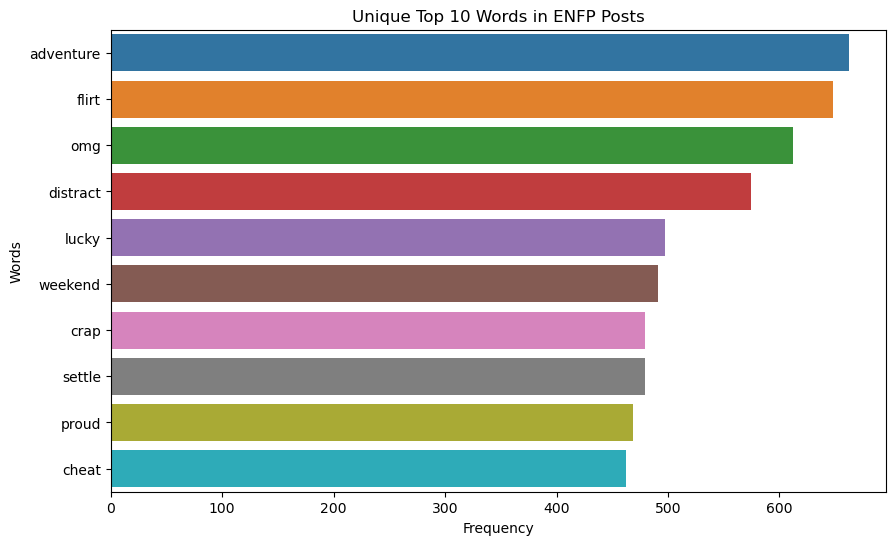

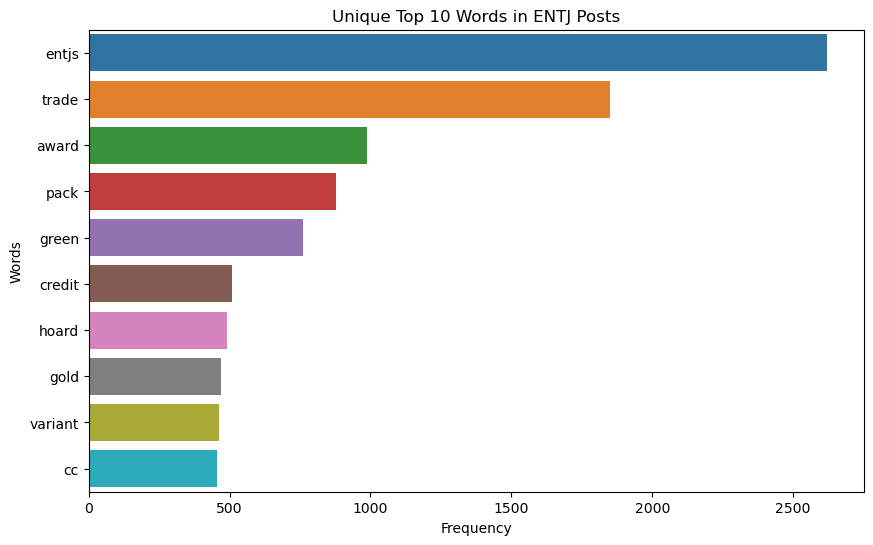

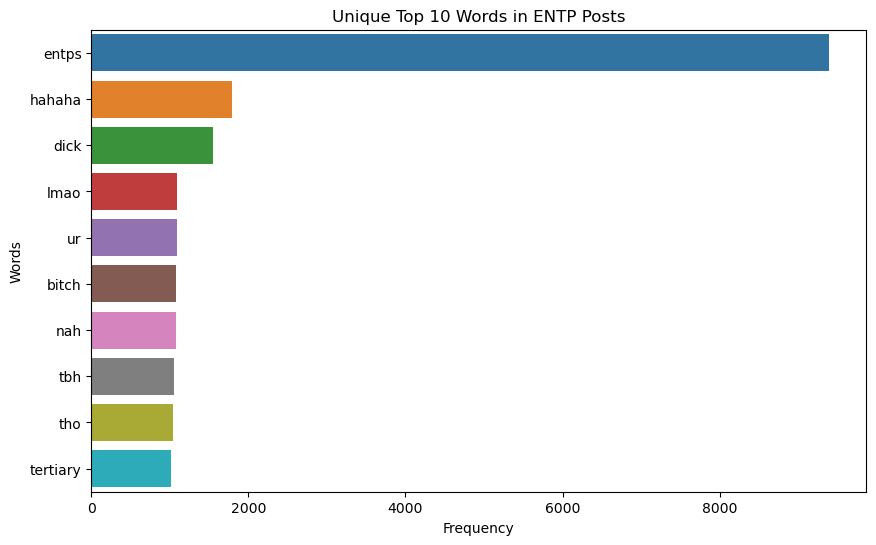

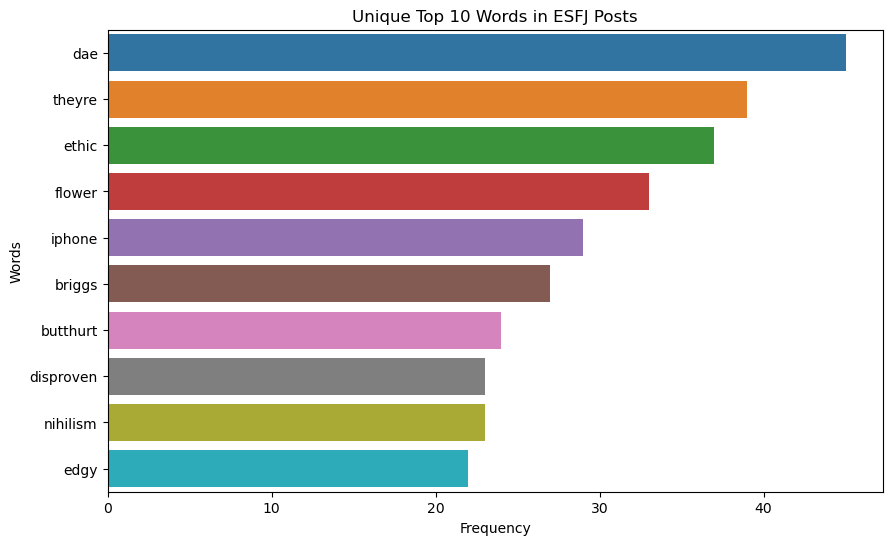

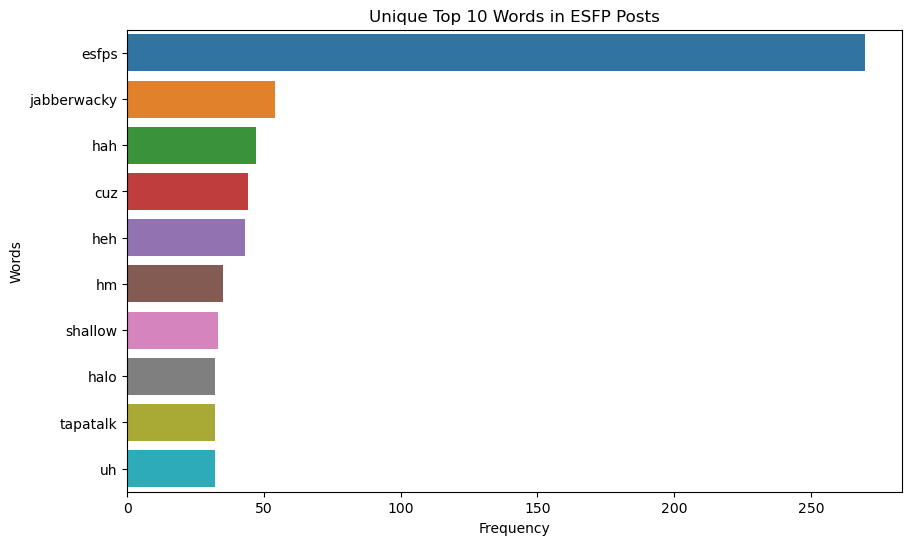

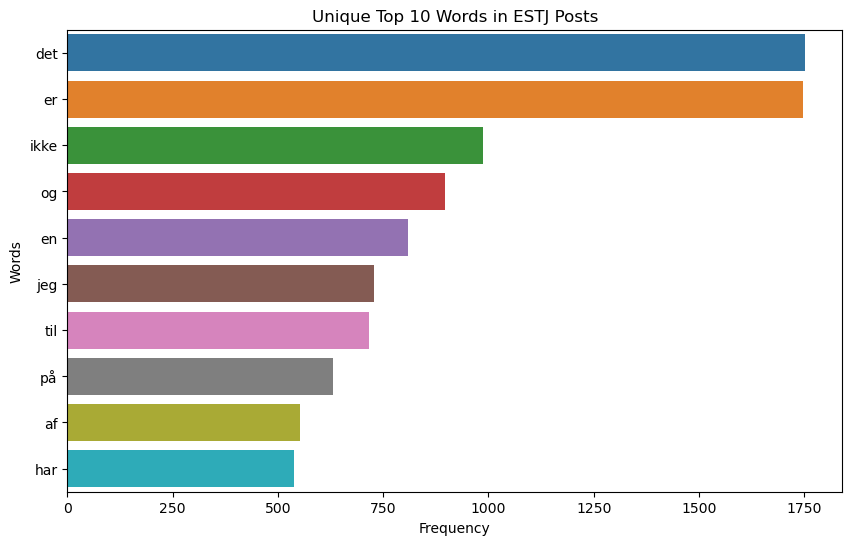

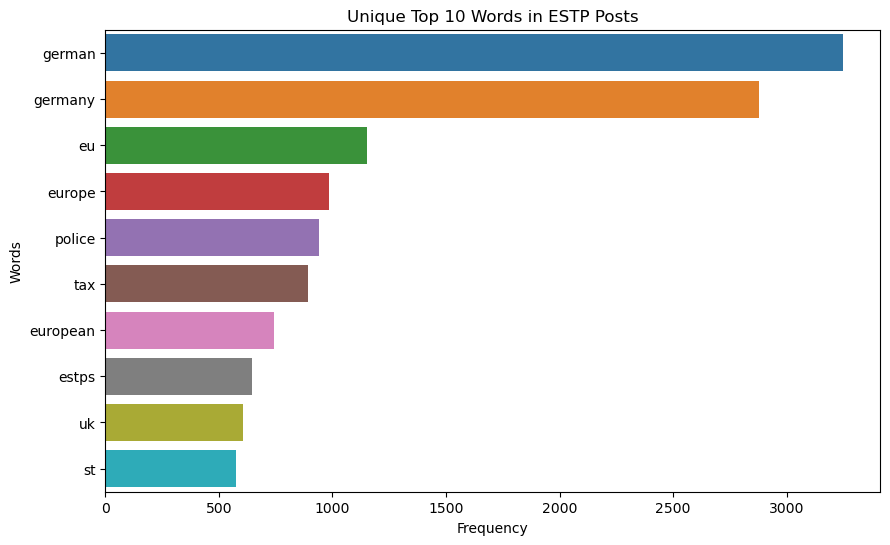

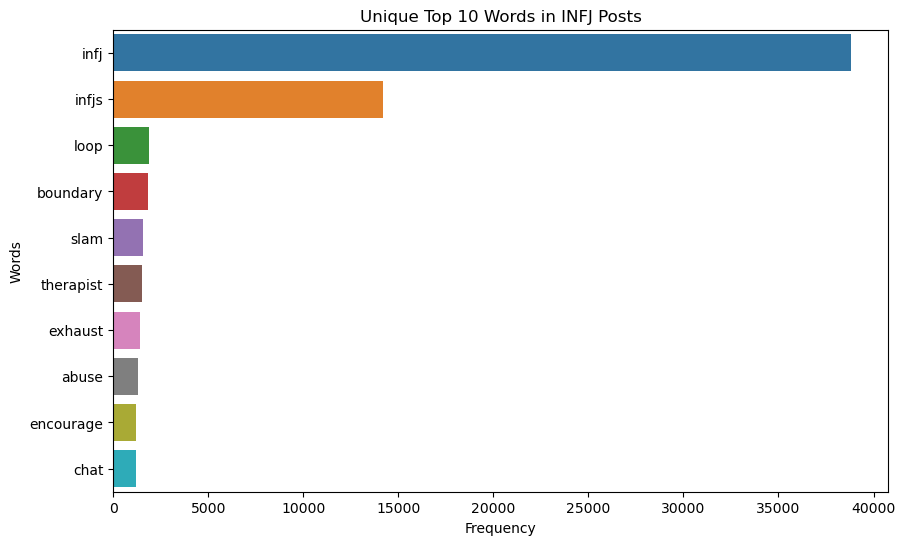

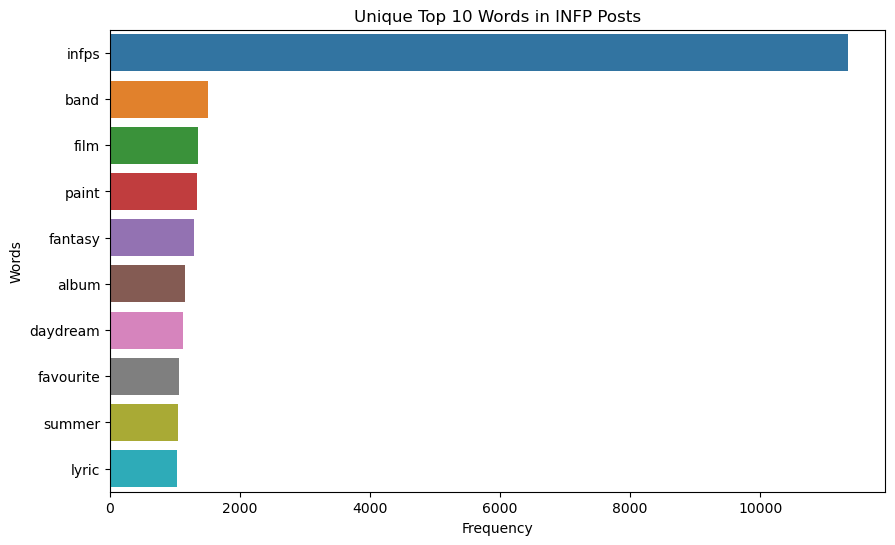

In [13]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

# 데이터 로드
csv_file_path = 'MBTI 500.csv'
mbti_data = pd.read_csv(csv_file_path)

# CountVectorizer 인스턴스 생성
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# MBTI 유형별 단어 빈도 계산
mbti_types = mbti_data['type'].unique()
word_freq_per_type = defaultdict(dict)

for mbti_type in mbti_types:
    texts = mbti_data[mbti_data['type'] == mbti_type]['posts']
    vectorized = vectorizer.fit_transform(texts)
    words = vectorizer.get_feature_names_out()
    frequencies = vectorized.sum(axis=0).A1
    freq_dict = dict(zip(words, frequencies))
    word_freq_per_type[mbti_type] = freq_dict

# 각 유형별로 고유한 단어 추출
unique_words_per_type = {}

for mbti_type, word_freq in word_freq_per_type.items():
    other_types = set(mbti_types) - {mbti_type}
    other_words_freq = defaultdict(int)

    for other_type in other_types:
        for word, freq in word_freq_per_type[other_type].items():
            other_words_freq[word] += freq

    unique_words = {word: freq for word, freq in word_freq.items() if freq > other_words_freq[word]}
    sorted_unique_words = dict(sorted(unique_words.items(), key=lambda item: item[1], reverse=True)[:10])
    unique_words_per_type[mbti_type] = sorted_unique_words

# 각 MBTI 유형별 고유 단어 시각화
for mbti_type, top_words in unique_words_per_type.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(top_words.values()), y=list(top_words.keys()))
    plt.title(f"Unique Top 10 Words in {mbti_type} Posts")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()


# 결과를 보면, 자신의 MBTI에 대한 언급이 1,2등에 나와서 이를 제거하고 다시 분석하기로 함

In [19]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

# 데이터 로드
csv_file_path = 'MBTI 500.csv'
mbti_data = pd.read_csv(csv_file_path)

# CountVectorizer 인스턴스 생성
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# MBTI 유형별 단어 빈도 계산
mbti_types = mbti_data['type'].unique()
word_freq_per_type = defaultdict(dict)

for mbti_type in mbti_types:
    texts = mbti_data[mbti_data['type'] == mbti_type]['posts']
    vectorized = vectorizer.fit_transform(texts)
    words = vectorizer.get_feature_names_out()
    frequencies = vectorized.sum(axis=0).A1
    freq_dict = dict(zip(words, frequencies))
    word_freq_per_type[mbti_type] = freq_dict

# 각 유형별로 고유한 단어 추출
unique_words_per_type = {}

for mbti_type, word_freq in word_freq_per_type.items():
    other_types = set(mbti_types) - {mbti_type}
    other_words_freq = defaultdict(int)

    for other_type in other_types:
        for word, freq in word_freq_per_type[other_type].items():
            other_words_freq[word] += freq

    unique_words = {word: freq for word, freq in word_freq.items() if freq > other_words_freq[word] and mbti_type.lower() not in word}
    sorted_unique_words = dict(sorted(unique_words.items(), key=lambda item: item[1], reverse=True)[:10])
    unique_words_per_type[mbti_type] = sorted_unique_words

# 이미지를 저장할 디렉토리 설정
save_dir = './images/'

# 각 MBTI 유형별 고유 단어 시각화 및 저장
for mbti_type, word_freq in unique_words_per_type.items():
    # 새로운 그래프 생성
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(word_freq.values()), y=list(word_freq.keys()))
    plt.title(f"{mbti_type} unique word TOP 10")
    plt.xlabel("times")
    plt.ylabel("word")

    # 파일 경로 설정
    file_path = f"{save_dir}{mbti_type}_unique_words.png"
    
    # 그래프를 파일로 저장
    plt.savefig(file_path)
    
    # 현재 플롯을 닫음
    plt.close()